In [1]:
#BTC & ETH MCsimulation data
# 75% BTC, 25% ETH


In [2]:
# Initial Imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
from MCForecastTools import MCSimulation
from fastquant import get_crypto_data
from fastquant import get_stock_data
import datetime as dt
import seaborn
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
%matplotlib inline

In [3]:
# Crypto Info
BTC_1 = get_crypto_data("BTC/USDT", "2017-08-17", "2022-03-19")
ETH_1 = get_crypto_data("ETH/USDT", "2017-08-17", "2022-03-19")       

# Multi Index
BTC_1.columns = pd.MultiIndex.from_product([['BTC_1'], BTC_1.columns])
ETH_1.columns = pd.MultiIndex.from_product([['ETH_1'], ETH_1.columns])

# Combine Crypto Info
stock_data = pd.concat([BTC_1, ETH_1], axis=1)
stock_data = stock_data.dropna()

In [4]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = stock_data,
    weights = [.75, .25],
    num_simulation = 1000,
    num_trading_days = 365*5
)

In [5]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

BTC_1                                                       \
               open     high      low    close       volume daily_return   
dt                                                                         
2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264          NaN   
2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763     0.007694   
2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022    -0.012969   
2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060    -0.017201   
2017-08-22  4016.00  4104.82  3400.00  4040.00   966.684858     0.005976   

             ETH_1                                                   
              open    high     low   close      volume daily_return  
dt                                                                   
2017-08-18  302.00  311.79  283.94  293.96  9537.84646          NaN  
2017-08-19  293.31  299.90  278.00  290.91  2146.19773    -0.010376  
2017-08-20  289.41  300.53  282.85  299.10  2510.13871     0.028153  
2017-08-21  299.10  346.52  294.60  323.29  5219.44542     0.080876  
2017-08-22  321.04  330.41  144.21  309.80  7956.35088    -0.041727

In [18]:
returns = MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

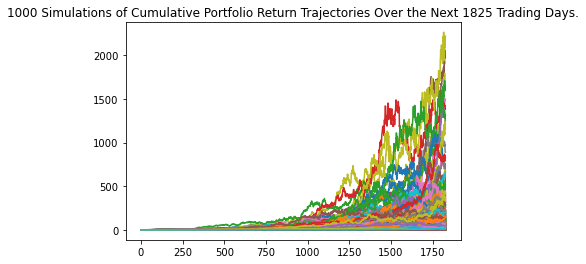

In [19]:
line_plot = MC_even_dist.plot_simulation()

In [20]:
even_tbl = MC_even_dist.summarize_cumulative_return()
print(even_tbl)

count           1000.000000
mean              85.158854
std              186.245305
min                0.197499
25%               10.792133
50%               29.326389
75%               80.562727
max             2216.953735
95% CI Lower       1.790876
95% CI Upper     509.679966
Name: 1825, dtype: float64


In [21]:
#set inital investment
initial_investment = 400000

# Use the lower and upper 95% confidence intervals to calculate the range of possible outcomes of our $100,000
ci_lower = round(even_tbl[8]*(initial_investment),2)
ci_upper = round(even_tbl[9]*(initial_investment),2)
ci_25 = round(even_tbl[4]*(initial_investment),2)
ci_50_50 = round(even_tbl[5]*(initial_investment)*.25,2)

# print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

print(f"There is a 75% chance that an initial investment of ${initial_investment} will be worth ${ci_25}")

print(f"Median with a 75% discount rate is ${ci_50_50} after five years")

There is a 95% chance that an initial investment of $400000 in the portfolio over the next 5 years will end within the range of $716350.6 and $203871986.52
There is a 75% chance that an initial investment of $400000 will be worth $4316853.07
Median with a 75% discount rate is $2932638.87 after five years


In [22]:
mean = round(even_tbl[1])
std = round(even_tbl[2])


sharpe_ratio = mean/std
sharpe_ratio

0.45698924731182794

In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
initial_investment = 400000
returns_d = returns.copy()

for col in returns.columns:
    returns_d[col] = returns_d[col] * initial_investment
    
returns_d

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000,...,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000,400000.000
1,396672.159,388749.938,400928.769,419366.733,416924.725,393475.935,403810.175,416605.740,406624.222,401197.153,...,401417.384,384922.764,404431.213,392362.704,399029.677,379099.224,389925.052,408110.376,402947.623,411214.522
2,379051.491,388790.755,400658.180,393887.806,424047.517,366698.541,417013.418,418595.657,402683.548,398926.341,...,394948.204,384225.118,436467.881,401852.307,392738.703,373469.211,395735.839,402778.934,426789.747,425620.142
3,387456.719,376420.844,396361.150,393885.627,413680.348,380350.693,403576.526,412845.809,396637.469,408452.728,...,399316.857,387209.893,461225.254,404925.079,398547.127,352606.712,395666.479,398846.966,459706.036,429583.701
4,382828.408,366691.837,393966.753,419052.270,423987.342,384338.971,403394.122,387034.837,423029.900,400959.256,...,387988.999,383723.208,453929.628,404675.245,396192.826,352480.476,396104.765,407101.531,477271.827,437211.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,826720.479,76032721.515,47124619.087,1608014.868,2647483.134,12177866.913,3449449.728,384663516.050,186163047.793,24371023.807,...,6831114.121,52245632.607,4451204.629,3716651.552,18597953.188,4587263.939,11288455.153,3760884.851,6675104.970,7587425.111
1822,840678.349,77654372.972,48294483.739,1561810.548,2634907.601,12581313.759,3362087.368,392755093.956,184807556.273,25652722.713,...,6690732.452,54043711.492,4524551.148,3607191.832,19075870.594,4677755.957,11948575.884,3850680.619,6387499.810,7604126.064
1823,803335.898,78595525.670,48135220.111,1555407.222,2566848.913,12667913.015,3458769.997,370746499.773,187914690.792,25802280.617,...,6761926.997,54912123.962,4151386.153,3797428.971,18830078.151,4597111.413,12067068.917,3667935.288,6284640.963,7921531.604
1824,792798.503,81995619.718,45316506.338,1608235.954,2556775.624,11893191.987,3373809.382,357762905.956,180633325.252,25788571.389,...,7130273.272,57080593.730,4190263.825,3938475.755,19165551.455,4624197.461,11999888.725,3761399.608,6249628.762,7807162.666


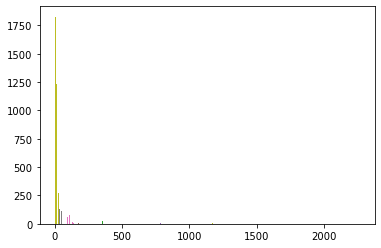

In [27]:
plt.hist(returns-1, 100)
plt.show()

In [11]:
# Get stock data
SPY_1 = get_stock_data("SPY", "2007-01-02", "2022-03-19")
QQQ_1 = get_stock_data("QQQ", "2007-01-02", "2022-03-19")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
SPY_1.columns = pd.MultiIndex.from_product([['SPY_1'], SPY_1.columns])
QQQ_1.columns = pd.MultiIndex.from_product([['QQQ_1'], QQQ_1.columns])

# Combine Stock Info
stock_data_1 = pd.concat([SPY_1, QQQ_1], axis=1)
stock_data_1 = stock_data.dropna()

In [13]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_1 = MCSimulation(
    portfolio_data = stock_data_1,
    weights = [.5, .5],
    num_simulation = 1000,
    num_trading_days = 252*5
)

MC_even_dist_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.969743,0.984217,0.933521,1.048888,1.025096,1.005226,0.983069,1.010959,0.989968,1.017332,...,0.986944,1.041339,1.002010,1.006345,0.987043,1.000793,0.968040,0.971604,1.037073,1.025254
2,1.014095,0.956541,0.951346,1.040701,1.022790,0.979582,0.970824,1.038128,0.976442,1.031973,...,0.999898,1.018879,0.996020,0.995293,1.028272,0.996662,0.960920,0.924241,1.016640,1.091774
3,1.063552,0.959479,0.975239,0.960656,1.040433,0.981334,0.940681,1.059201,0.996343,1.047601,...,0.936088,0.965665,1.031587,1.027665,1.119947,0.998763,0.969337,0.922808,0.979710,1.042911
4,1.070138,0.968935,0.997627,1.014613,1.077606,1.001573,0.879323,1.075236,0.974627,1.020188,...,0.970012,0.958980,1.100199,1.073818,1.096655,0.995972,1.017729,0.924140,0.931365,1.058779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,10.273621,3.619137,24.743160,1.244541,45.788979,104.199637,64.819648,21.774675,7.514510,30.637563,...,9.101116,8.954957,40.118155,12.945653,30.536856,12.826372,18.769573,2.888013,15.570990,16.433618
1257,10.392267,3.646147,24.168267,1.197685,46.936540,104.472315,63.004415,21.602606,7.198684,30.713210,...,9.143640,8.969315,40.029946,12.286911,30.625346,12.717619,19.183174,2.783562,15.422968,15.762835
1258,10.907345,3.688806,24.426034,1.179702,44.919361,108.916292,68.015841,22.317439,7.307662,29.862694,...,9.489482,8.769929,42.088330,13.122987,30.779561,13.048043,19.395330,2.659923,15.074820,16.199291
1259,10.774933,3.643028,24.341536,1.171911,45.091477,105.892578,69.557925,21.906887,7.245821,29.853374,...,9.271175,8.754466,40.774542,13.029607,31.673780,12.289469,19.289865,2.676625,15.007422,16.614814


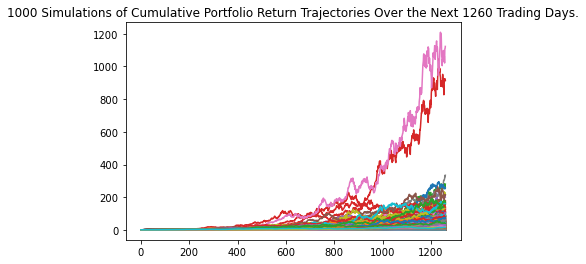

In [14]:
line_plot_1 = MC_even_dist_1.plot_simulation()

In [15]:
even_tbl_1 = MC_even_dist_1.summarize_cumulative_return()
print(even_tbl_1)

count           1000.000000
mean              24.597229
std               54.898520
min                0.408324
25%                5.826147
50%               11.729503
75%               25.691716
max             1122.488631
95% CI Lower       1.270235
95% CI Upper     112.427701
Name: 1260, dtype: float64


In [17]:
#set inital investment
initial_investment = 400000

# Use the lower and upper 95% confidence intervals to calculate the range of possible outcomes of our $100,000
ci_lower_1 = round(even_tbl_1[8]*(initial_investment),2)
ci_upper_1 = round(even_tbl_1[9]*(initial_investment),2)
ci_25_1 = round(even_tbl_1[4]*(initial_investment),2)
ci_50_50_1 = round(even_tbl_1[5]*(initial_investment)*.25,2)

# print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower_1} and ${ci_upper_1}")

print(f"There is a 75% chance that an initial investment of ${initial_investment} will be worth ${ci_25_1}")

print(f"Median with a 75% discount rate is ${ci_50_50_1} after five years")

There is a 95% chance that an initial investment of $400000 in the portfolio over the next 5 years will end within the range of $508093.89 and $44971080.42
There is a 75% chance that an initial investment of $400000 will be worth $2330458.92
Median with a 75% discount rate is $1172950.27 after five years
